In [22]:
import numpy as np
import pandas as pd
df = pd.read_csv("../data/销售量按日期单品合并_剔除后.csv",encoding='utf-8')
print(df)

           销售日期  102900005115823   102900005115908   102900005115779   \
0      2020/7/1            11.476             8.959            41.966   
1      2020/7/2             6.806            14.275            44.873   
2      2020/7/3            13.120             8.173            36.309   
3      2020/7/4            28.186            13.034            51.205   
4      2020/7/5            12.038            10.791            34.249   
...         ...               ...               ...               ...   
1090  2023/6/26             1.420             0.000             7.971   
1091  2023/6/27             1.823             0.822             0.251   
1092  2023/6/28             5.553             2.701             0.000   
1093  2023/6/29             4.687             0.000             2.904   
1094  2023/6/30             7.036             0.000             0.000   

      102900005118824   102900005115984   102900005115762   102900005116714   \
0                4.119            32.579   

In [23]:
pl = pd.read_excel("../data/附件1.xlsx")
pl['单品编码'] = pl['单品编码'].astype(str)
pl = pl.set_index('单品编码')

Epoch 1/5
23/23 - 1s - loss: 0.0588 - 1s/epoch - 55ms/step
Epoch 2/5
23/23 - 0s - loss: 0.0440 - 27ms/epoch - 1ms/step
Epoch 3/5
23/23 - 0s - loss: 0.0335 - 28ms/epoch - 1ms/step
Epoch 4/5
23/23 - 0s - loss: 0.0271 - 25ms/epoch - 1ms/step
Epoch 5/5
23/23 - 0s - loss: 0.0234 - 25ms/epoch - 1ms/step
12/12 [==============================] - 0s 908us/step
Train Score: 6.50 RMSE
Test Score: 4.53 RMSE
Epoch 1/5
725/725 - 2s - loss: 0.0310 - 2s/epoch - 2ms/step
Epoch 2/5
725/725 - 1s - loss: 0.0178 - 531ms/epoch - 732us/step
Epoch 3/5
725/725 - 1s - loss: 0.0159 - 517ms/epoch - 713us/step
Epoch 4/5
725/725 - 1s - loss: 0.0153 - 515ms/epoch - 710us/step
Epoch 5/5
725/725 - 1s - loss: 0.0150 - 513ms/epoch - 707us/step
12/12 [==============================] - 0s 817us/step
Train Score: 5.27 RMSE
Test Score: 3.20 RMSE
Epoch 1/5
363/363 - 1s - loss: 0.0243 - 1s/epoch - 4ms/step
Epoch 2/5
363/363 - 0s - loss: 0.0158 - 403ms/epoch - 1ms/step
Epoch 3/5
363/363 - 0s - loss: 0.0150 - 398ms/epoch - 1ms/

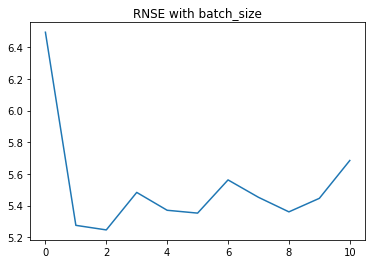

In [24]:
RMSE = pd.DataFrame([])
# LSTM for international airline passengers problem with regression framing
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
tf.random.set_seed(7)
for batch_size in range(11):
    # load the dataset
    dataframe = df[['销售日期','102900005115823 ']]
    dataframe.set_index(["销售日期"], inplace=True)
    dataset = dataframe.values
    dataset = dataset.astype('float32')
    # normalize the dataset
    scaler = MinMaxScaler(feature_range=(0, 1))
    dataset = scaler.fit_transform(dataset)
    # split into train and test sets
    train_size = int(len(dataset) * 0.67)
    test_size = len(dataset) - train_size
    train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
    # reshape into X=t and Y=t+1
    look_back = 7
    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_dataset(test, look_back)
    # reshape input to be [samples, time steps, features]
    trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    # create and fit the LSTM network
    model = Sequential()
    model.add(LSTM(4, input_shape=(1, look_back)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
        model.fit(trainX, trainY, epochs=5, batch_size=2, verbose=2)
    # make predictions
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)
    # invert predictions
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform([testY])
    # calculate root mean squared error
    trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
    print('Train Score: %.2f RMSE' % (trainScore))
    testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
    print('Test Score: %.2f RMSE' % (testScore))
    RMSE[batch_size] = [trainScore]

# plot baseline and predictions
print(RMSE)
plt.plot(RMSE.T)
plt.title('RNSE with batch_size')
plt.savefig('../data/preLineCharts/'+'RNSE with batch_size.jpg')
plt.show()